In [1]:
!pip install torch torchvision torchaudio

In [2]:
import sys
print(sys.executable)

C:\Users\Oluwayemi\anaconda3\envs\tf_env\python.exe


In [3]:
!{sys.executable} -m pip install torch torchvision torchaudio

In [51]:
import torch
print(torch.__version__)

2.8.0+cpu


In [3]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

sns.set_theme(context='notebook', palette='pastel', style='whitegrid')



In [4]:
# Load the dataset
df = pd.read_csv('psychiatry_readmission.csv') 

In [5]:
# Display the first few rows
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MedicationAdherence,NumberOfPreviousAdmissions,LengthOfStay,Diagnosis,SuicidalIdeation,Homeless,SocialSupport,FunctionalImpairment,CognitiveImpairment,Readmitted
0,10001,21,0,0,0,28.6,0,10.2,5.3,9.9,...,0.15,2,17,Bipolar,1,0,0,0.41,0.71,1
1,10002,81,0,3,2,25.1,1,6.7,6.0,5.9,...,0.40,4,42,Bipolar,0,1,2,0.39,0.19,1
2,10003,45,0,1,3,37.6,0,10.1,8.9,8.6,...,0.40,2,16,Schizophrenia,0,0,0,0.52,0.31,1
3,10004,21,1,0,2,43.3,0,4.4,2.7,5.4,...,0.62,2,52,Depression,1,0,0,0.19,0.82,1
4,10005,89,0,3,3,17.6,0,20.0,3.6,8.6,...,0.77,2,25,Anxiety,1,0,1,0.85,0.93,1


In [6]:
df.shape

(2500, 23)

In [7]:
df.info

<bound method DataFrame.info of       PatientID  Age  Gender  Ethnicity  EducationLevel   BMI  Smoking  \
0         10001   21       0          0               0  28.6        0   
1         10002   81       0          3               2  25.1        1   
2         10003   45       0          1               3  37.6        0   
3         10004   21       1          0               2  43.3        0   
4         10005   89       0          3               3  17.6        0   
...         ...  ...     ...        ...             ...   ...      ...   
2495      12496   67       0          3               0  25.3        0   
2496      12497   18       0          3               2  31.4        1   
2497      12498   80       0          3               1  27.5        0   
2498      12499   67       0          1               1  36.5        1   
2499      12500   78       0          1               1  31.9        1   

      AlcoholConsumption  PhysicalActivity  DietQuality  ...  \
0              

In [8]:
#Check for missing values

In [9]:
df.isnull().sum()

PatientID                     0
Age                           0
Gender                        0
Ethnicity                     0
EducationLevel                0
BMI                           0
Smoking                       0
AlcoholConsumption            0
PhysicalActivity              0
DietQuality                   0
SleepQuality                  0
FamilyHistoryPsych            0
Comorbidities                 0
MedicationAdherence           0
NumberOfPreviousAdmissions    0
LengthOfStay                  0
Diagnosis                     0
SuicidalIdeation              0
Homeless                      0
SocialSupport                 0
FunctionalImpairment          0
CognitiveImpairment           0
Readmitted                    0
dtype: int64

Outliers in BMI: 19


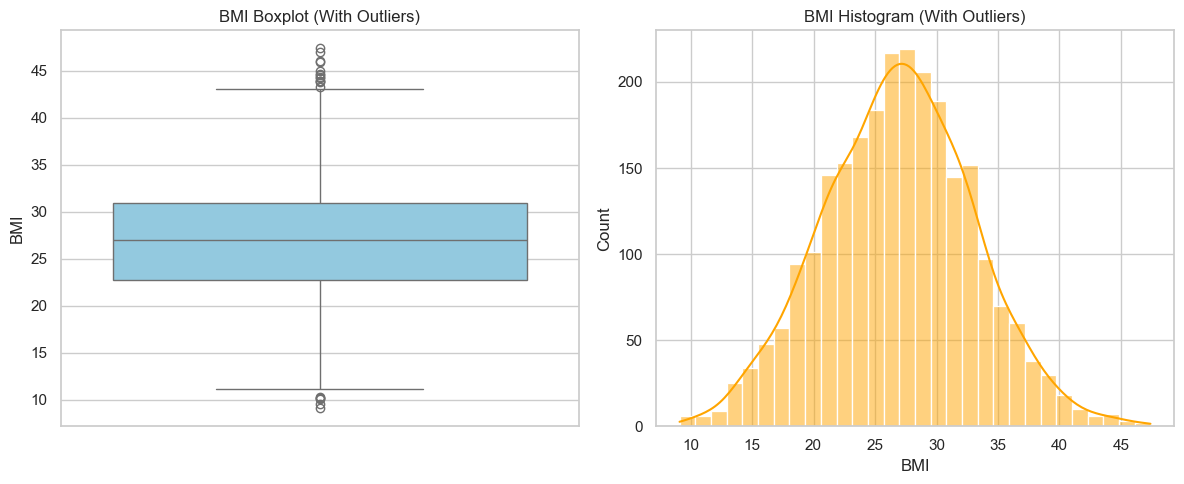

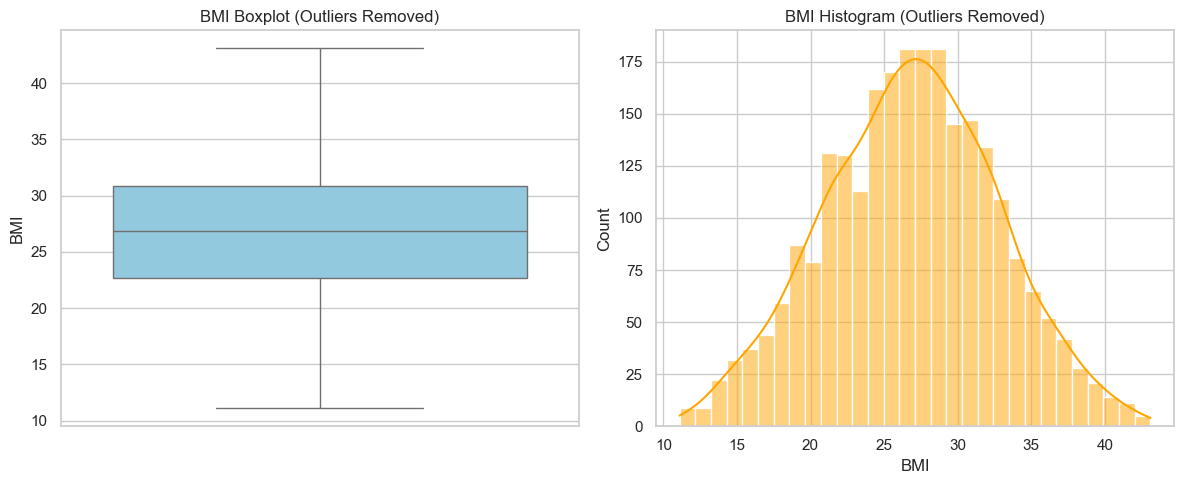

In [10]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return boolean mask of outliers
    return (data[column] < lower_bound) | (data[column] > upper_bound)

# Detect outliers in BMI
outlier_mask = detect_outliers_iqr(df, 'BMI')
bmi_outliers = df[outlier_mask]
print(f"Outliers in BMI: {bmi_outliers.shape[0]}")

# Plot before removing outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['BMI'], color='skyblue')
plt.title("BMI Boxplot (With Outliers)")

plt.subplot(1, 2, 2)
sns.histplot(df['BMI'], bins=30, kde=True, color='orange')
plt.title("BMI Histogram (With Outliers)")

plt.tight_layout()
plt.show()

# Remove outliers
df_no_outliers = df[~outlier_mask]

# Plot after removing outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_no_outliers['BMI'], color='skyblue')
plt.title("BMI Boxplot (Outliers Removed)")

plt.subplot(1, 2, 2)
sns.histplot(df_no_outliers['BMI'], bins=30, kde=True, color='orange')
plt.title("BMI Histogram (Outliers Removed)")

plt.tight_layout()
plt.show()


In [11]:
print(df.columns.tolist())

['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryPsych', 'Comorbidities', 'MedicationAdherence', 'NumberOfPreviousAdmissions', 'LengthOfStay', 'Diagnosis', 'SuicidalIdeation', 'Homeless', 'SocialSupport', 'FunctionalImpairment', 'CognitiveImpairment', 'Readmitted']


In [12]:
categorical_cols = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking']  # <-- Adjust if needed
# Detect columns with few unique values (likely categorical)
categorical_cols = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtype in ['int64', 'object']]

print("Detected categorical columns:", categorical_cols)


Detected categorical columns: ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryPsych', 'Comorbidities', 'NumberOfPreviousAdmissions', 'Diagnosis', 'SuicidalIdeation', 'Homeless', 'SocialSupport', 'Readmitted']


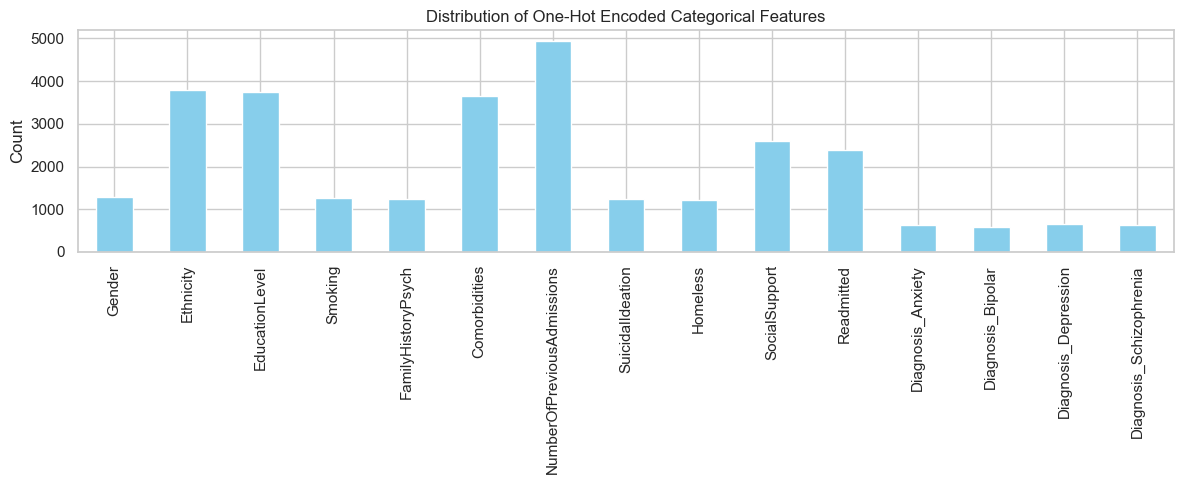

In [13]:
df_encoded = pd.get_dummies(df[categorical_cols])
df_encoded.sum().plot(kind='bar', figsize=(12, 5), color='skyblue')
plt.title("Distribution of One-Hot Encoded Categorical Features")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

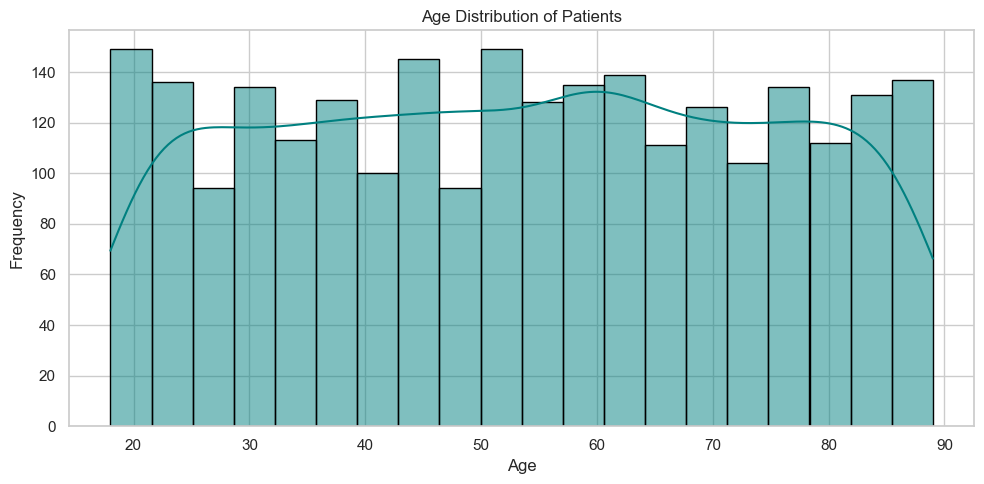

In [14]:
# Plot histogram of the 'Age' column
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='teal', edgecolor='black')

plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


Gender Distribution Percentages:
Gender
Male      51.72
Female    48.28


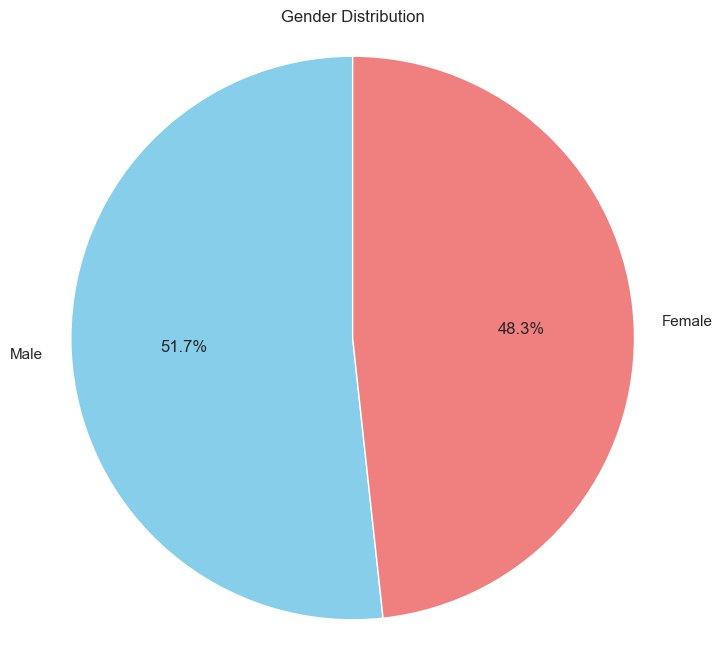

In [15]:
if 'Gender' in df.columns:
    # Count the occurrences of each gender
    gender_counts = df['Gender'].value_counts()

    # Calculate the total number of individuals
    total_individuals = gender_counts.sum()

    # Calculate the percentage for each gender
    gender_percentages = (gender_counts / total_individuals) * 100

    # Map the numerical gender values to labels
    gender_labels = {0: 'Female', 1: 'Male'}
    gender_percentages.index = gender_percentages.index.map(gender_labels)

    # Print the exact percentages
    print("Gender Distribution Percentages:")
    print(gender_percentages.round(2).to_string()) # .to_string() for better formatting in console

    # Create the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(gender_percentages, labels=gender_percentages.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
    plt.title('Gender Distribution')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
else:
    print("Error: 'Gender' column not found in the dataset.")


In [16]:
# Identify numerical columns: columns with more than 10 unique values are considered numerical
numerical_columns = [col for col in df.columns if df[col].nunique() > 10]

# Identify categorical columns: columns that are not numerical and not 'Diagnosis'
categorical_columns = df.columns.difference(numerical_columns).difference(['Readmitted']).to_list()

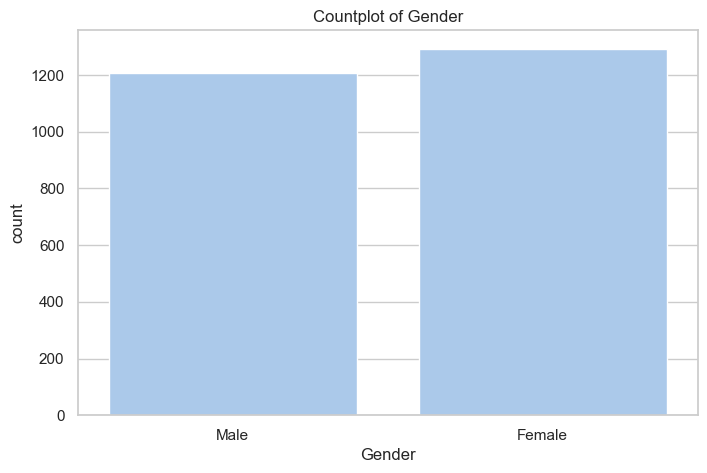

<Figure size 800x500 with 0 Axes>

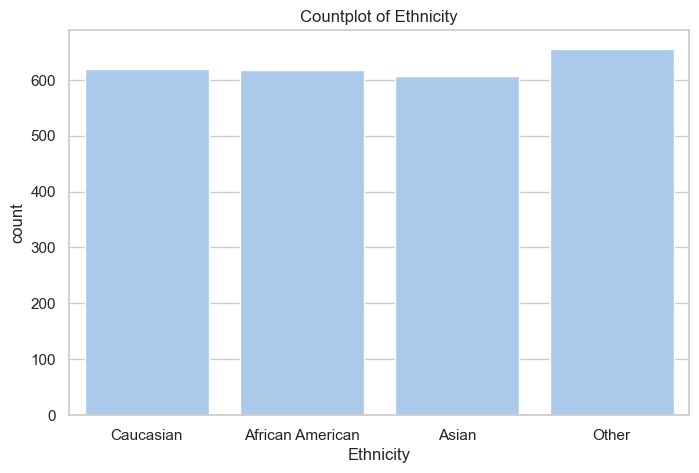

<Figure size 800x500 with 0 Axes>

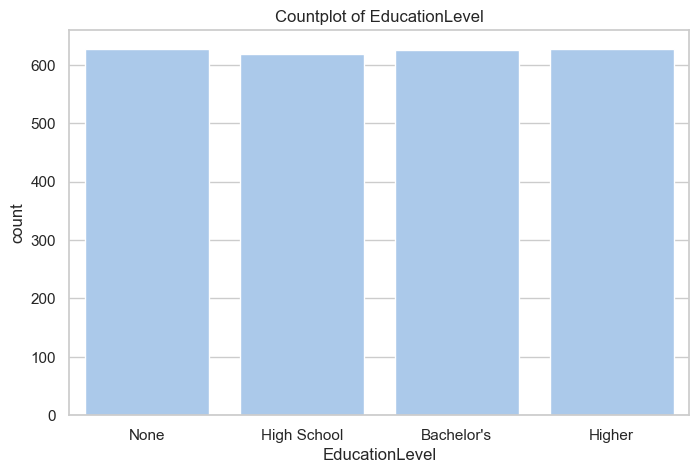

<Figure size 800x500 with 0 Axes>

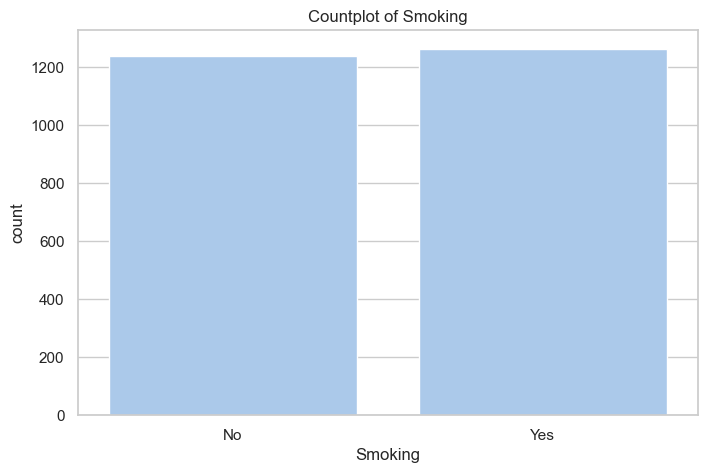

<Figure size 800x500 with 0 Axes>

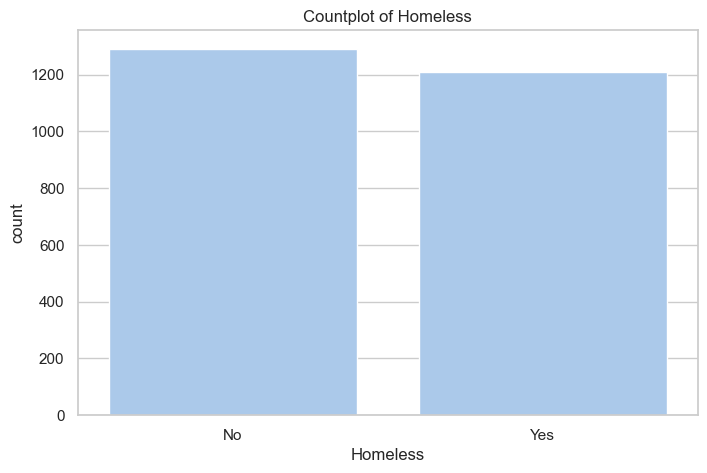

<Figure size 800x500 with 0 Axes>

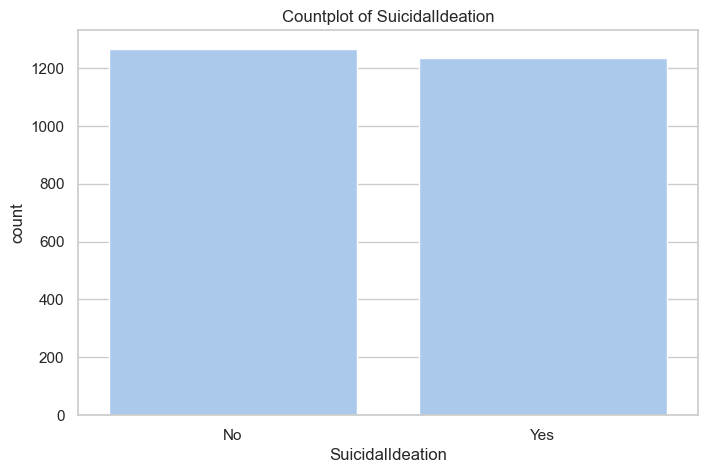

<Figure size 800x500 with 0 Axes>

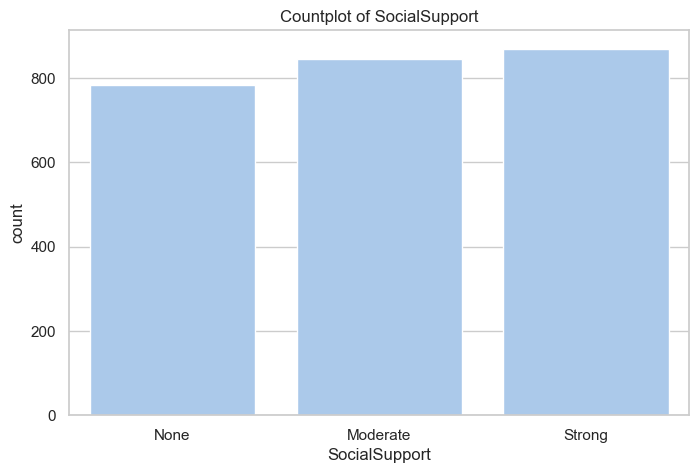

<Figure size 800x500 with 0 Axes>

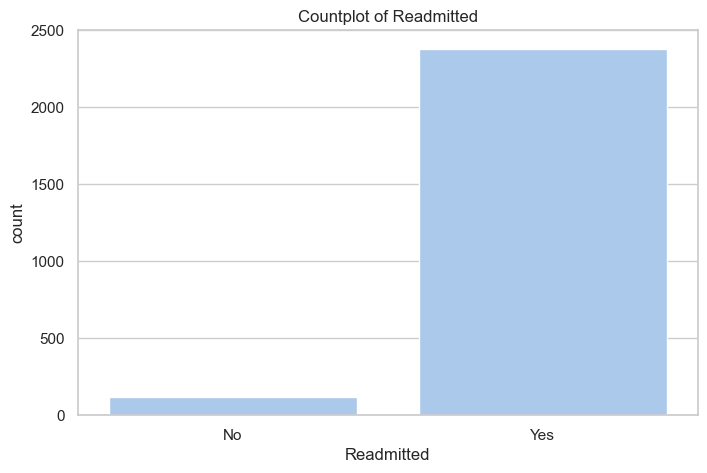

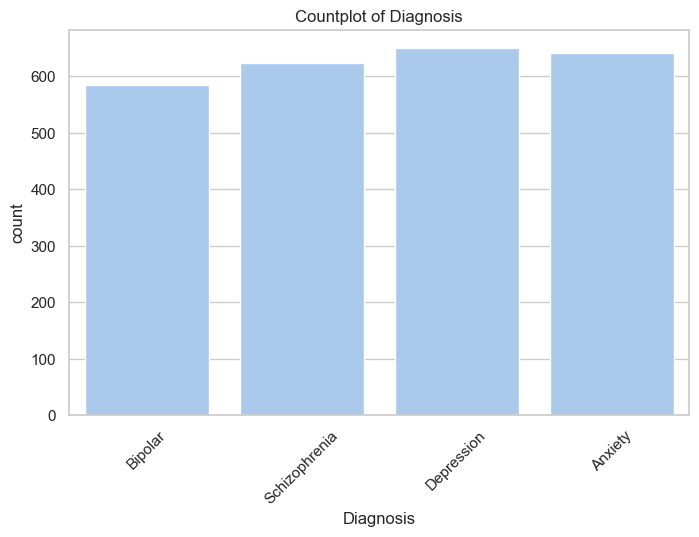

In [17]:
custom_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', "Bachelor's", 'Higher'],
    'Smoking': ['No', 'Yes'],
    'Homeless': ['No', 'Yes'],
    'SuicidalIdeation': ['No', 'Yes'],
    'SocialSupport': ['None', 'Moderate', 'Strong'],
    'Readmitted': ['No', 'Yes']
}
categorical_columns = [
    'Gender', 'Ethnicity', 'EducationLevel', 'Smoking',
    'Homeless', 'SuicidalIdeation', 'SocialSupport', 'Readmitted'
]
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')
    labels = custom_labels[column]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)
    plt.show()
    plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Diagnosis')
plt.title('Countplot of Diagnosis')
plt.xticks(rotation=45)
plt.show()


In [18]:
#drop null values in the column "readmitted"
df = df.dropna(subset=['Readmitted'])
df = df[df['Readmitted'] != 10]
# Drop all other remaining null values in the dataset
df = df.dropna()
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MedicationAdherence,NumberOfPreviousAdmissions,LengthOfStay,Diagnosis,SuicidalIdeation,Homeless,SocialSupport,FunctionalImpairment,CognitiveImpairment,Readmitted
0,10001,21,0,0,0,28.6,0,10.2,5.3,9.9,...,0.15,2,17,Bipolar,1,0,0,0.41,0.71,1
1,10002,81,0,3,2,25.1,1,6.7,6.0,5.9,...,0.40,4,42,Bipolar,0,1,2,0.39,0.19,1
2,10003,45,0,1,3,37.6,0,10.1,8.9,8.6,...,0.40,2,16,Schizophrenia,0,0,0,0.52,0.31,1
3,10004,21,1,0,2,43.3,0,4.4,2.7,5.4,...,0.62,2,52,Depression,1,0,0,0.19,0.82,1
4,10005,89,0,3,3,17.6,0,20.0,3.6,8.6,...,0.77,2,25,Anxiety,1,0,1,0.85,0.93,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,12496,67,0,3,0,25.3,0,11.2,7.3,7.8,...,0.83,1,52,Anxiety,1,0,1,0.75,0.78,1
2496,12497,18,0,3,2,31.4,1,4.7,5.6,3.8,...,0.94,1,5,Depression,0,1,2,0.08,0.48,1
2497,12498,80,0,3,1,27.5,0,5.6,8.4,1.3,...,0.67,3,25,Schizophrenia,0,0,2,0.77,0.78,1
2498,12499,67,0,1,1,36.5,1,16.0,1.0,5.4,...,0.42,1,34,Depression,0,1,0,0.97,0.41,1


In [19]:
#Recheck for null values 
df.isnull().sum()

PatientID                     0
Age                           0
Gender                        0
Ethnicity                     0
EducationLevel                0
BMI                           0
Smoking                       0
AlcoholConsumption            0
PhysicalActivity              0
DietQuality                   0
SleepQuality                  0
FamilyHistoryPsych            0
Comorbidities                 0
MedicationAdherence           0
NumberOfPreviousAdmissions    0
LengthOfStay                  0
Diagnosis                     0
SuicidalIdeation              0
Homeless                      0
SocialSupport                 0
FunctionalImpairment          0
CognitiveImpairment           0
Readmitted                    0
dtype: int64

In [20]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,Comorbidities,MedicationAdherence,NumberOfPreviousAdmissions,LengthOfStay,SuicidalIdeation,Homeless,SocialSupport,FunctionalImpairment,CognitiveImpairment,Readmitted
count,2500.00000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,...,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,11250.50000,53.47840,0.517200,1.519600,1.500800,26.894120,0.505200,10.149960,5.025800,5.526200,...,1.456800,0.496136,1.976000,30.412400,0.493200,0.483200,1.034400,0.508356,0.497364,0.952800
std,721.83216,20.68754,0.499804,1.127353,1.120045,6.081128,0.500073,5.746597,2.831742,2.595452,...,1.201962,0.285222,1.416554,16.961905,0.500054,0.499818,0.812823,0.286113,0.286362,0.212109
min,10001.00000,18.00000,0.000000,0.000000,0.000000,9.100000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10625.75000,35.00000,0.000000,1.000000,0.000000,22.700000,0.000000,5.200000,2.600000,3.300000,...,1.000000,0.240000,1.000000,16.000000,0.000000,0.000000,0.000000,0.260000,0.250000,1.000000
50%,11250.50000,54.00000,1.000000,2.000000,2.000000,27.000000,1.000000,10.300000,5.000000,5.500000,...,1.000000,0.500000,2.000000,30.000000,0.000000,0.000000,1.000000,0.510000,0.490000,1.000000
75%,11875.25000,71.00000,1.000000,3.000000,3.000000,30.900000,1.000000,15.200000,7.400000,7.725000,...,2.000000,0.740000,3.000000,45.000000,1.000000,1.000000,2.000000,0.760000,0.750000,1.000000
max,12500.00000,89.00000,1.000000,3.000000,3.000000,47.400000,1.000000,20.000000,10.000000,10.000000,...,6.000000,1.000000,8.000000,59.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000


In [21]:
#check for the amount of duplicated data values
sum(df.duplicated())

0

In [22]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

                            PatientID       Age    Gender  Ethnicity  \
PatientID                    1.000000  0.017420  0.038630   0.001171   
Age                          0.017420  1.000000  0.033725   0.014457   
Gender                       0.038630  0.033725  1.000000  -0.005570   
Ethnicity                    0.001171  0.014457 -0.005570   1.000000   
EducationLevel              -0.016037  0.014870  0.001762   0.025816   
BMI                          0.009630  0.001998  0.015760   0.012137   
Smoking                     -0.003967 -0.000202 -0.009964  -0.020055   
AlcoholConsumption          -0.033949  0.008971  0.009335  -0.011378   
PhysicalActivity            -0.007729  0.025398  0.008267   0.008547   
DietQuality                  0.008497  0.060779 -0.001628   0.007339   
SleepQuality                -0.006653 -0.008900  0.006438  -0.006037   
FamilyHistoryPsych           0.004183  0.016486  0.011565   0.003020   
Comorbidities               -0.026155 -0.045613 -0.008421   0.00

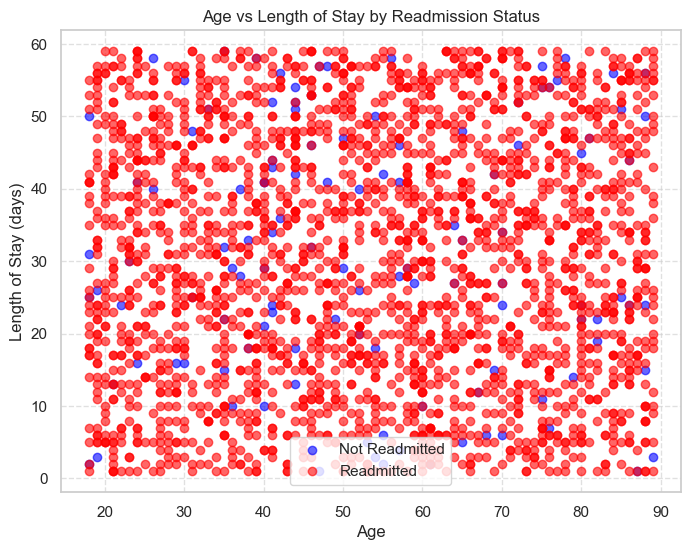

In [23]:
import matplotlib.pyplot as plt

# Drop rows with missing values in the selected columns and target
df_plot = df.dropna(subset=['Age', 'LengthOfStay', 'Readmitted'])

# Ensure 'Readmitted' is integer type
df_plot['Readmitted'] = df_plot['Readmitted'].astype(int)

colors = {0: 'blue', 1: 'red'}
labels = {0: 'Not Readmitted', 1: 'Readmitted'}

plt.figure(figsize=(8, 6))
for status in [0, 1]:
    subset = df_plot[df_plot['Readmitted'] == status]
    plt.scatter(subset['Age'], subset['LengthOfStay'],
                c=colors[status], label=labels[status], alpha=0.6)

plt.title('Age vs Length of Stay by Readmission Status')
plt.xlabel('Age')
plt.ylabel('Length of Stay (days)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


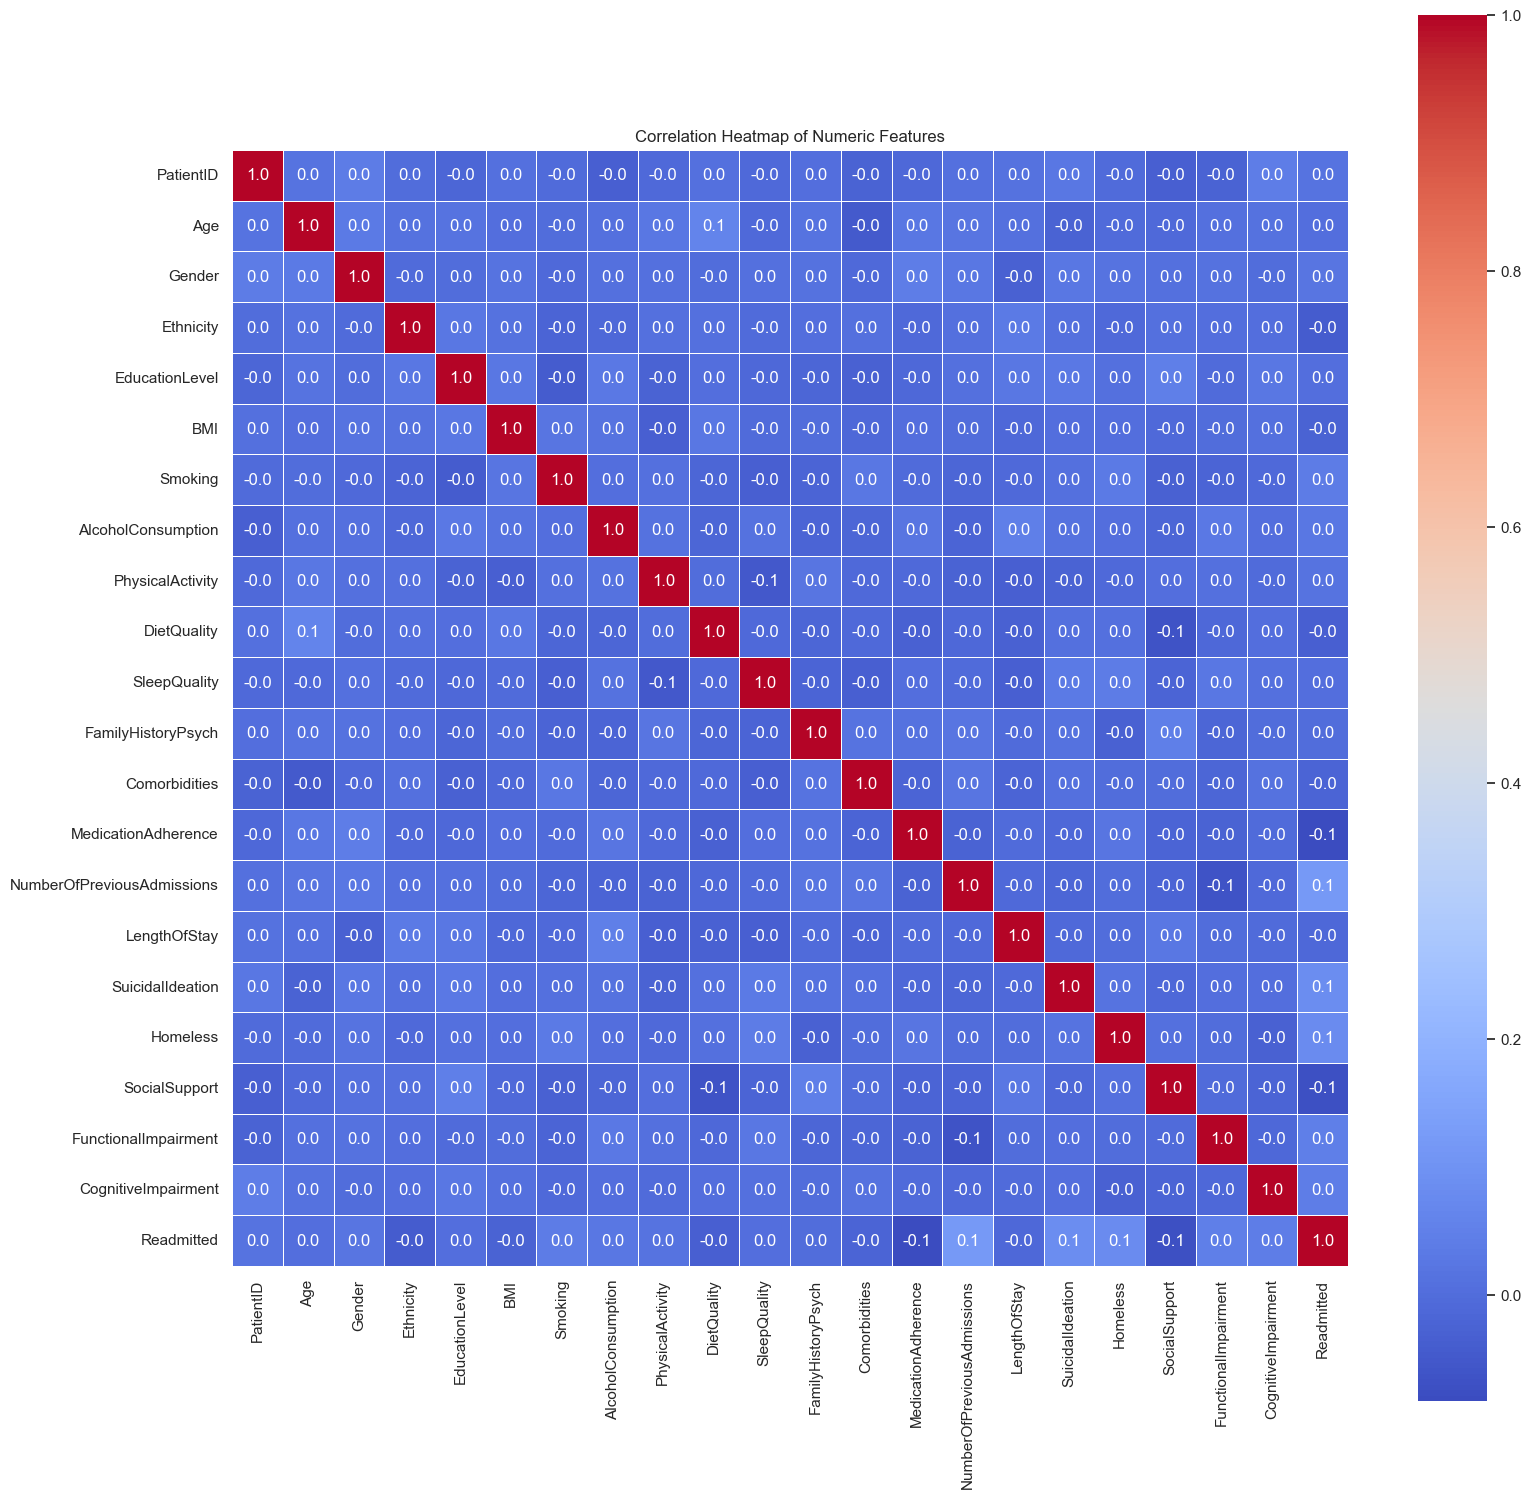

In [24]:
# Select numeric columns only to avoid errors from non-numeric data
numeric_df = df.select_dtypes(include=['number'])

# Create a large figure to make the heatmap readable
plt.figure(figsize=(18, 18))

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Draw a heatmap with annotations formatted to one decimal place
sns.heatmap(corr_matrix, annot=True, fmt='.1f', linewidths=0.5, cmap='coolwarm', square=True)

# Add title for clarity
plt.title('Correlation Heatmap of Numeric Features')

# Display the heatmap
plt.show()


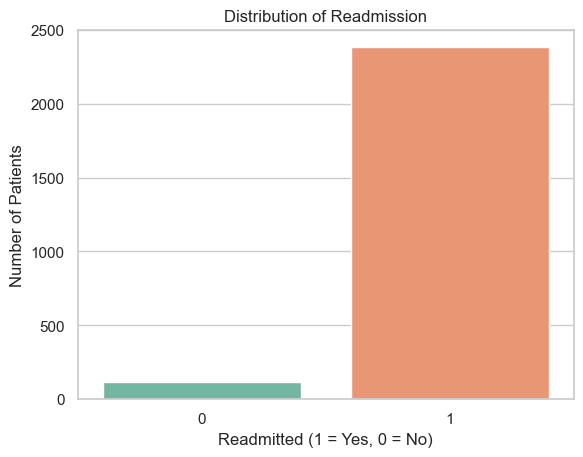

In [25]:
# Distribution of the target variable
# Plot the distribution of the target variable (Readmitted)
# Helps identify if the dataset is imbalanced — important for model performance
sns.countplot(x='Readmitted', data=df, palette='Set2')
plt.title('Distribution of Readmission')
plt.xlabel('Readmitted (1 = Yes, 0 = No)')
plt.ylabel('Number of Patients')
plt.show()


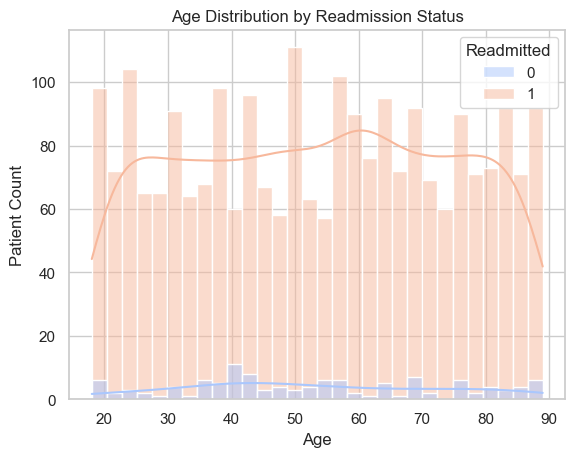

In [26]:
# Show how age is distributed among readmitted and non-readmitted patients
# Useful to see if older age is linked to higher readmission risk
sns.histplot(data=df, x='Age', hue='Readmitted', bins=30, kde=True, palette='coolwarm')
plt.title('Age Distribution by Readmission Status')
plt.xlabel('Age')
plt.ylabel('Patient Count')
plt.show()

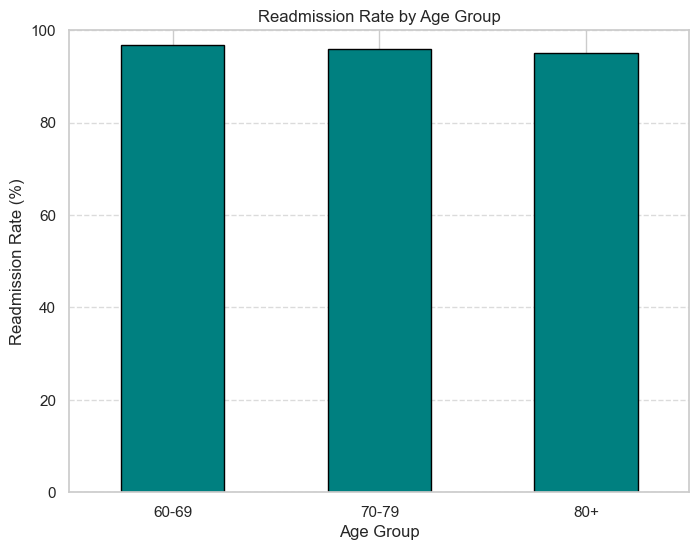

In [27]:

# Define age bins and labels
bins = [60, 69, 79, 120]  # Adjust max age as needed
labels = ['60-69', '70-79', '80+']

# Create age group column
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Calculate readmission rate per age group
readmission_rates = df.groupby('AgeGroup')['Readmitted'].mean() * 100  # convert to percentage

# Plot bar chart
plt.figure(figsize=(8, 6))
readmission_rates.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Readmission Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Readmission Rate (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()


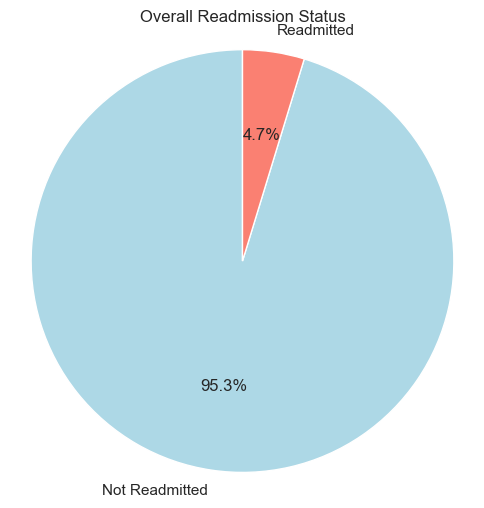

In [28]:
# Calculate counts for readmission status
readmission_counts = df['Readmitted'].value_counts()

# Labels for pie chart
labels = ['Not Readmitted', 'Readmitted']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(readmission_counts, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'salmon'], startangle=90)
plt.title('Overall Readmission Status')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()


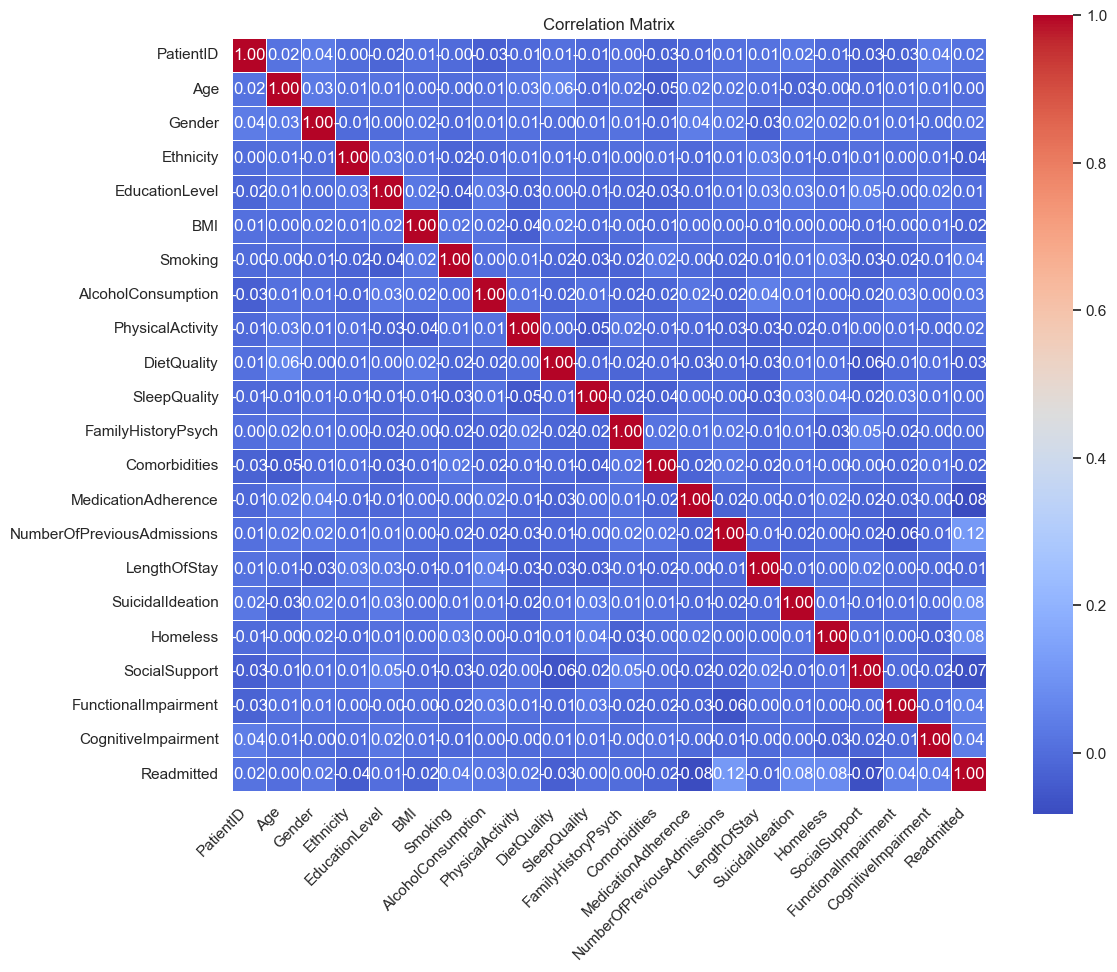

In [29]:
# Select numeric columns only to avoid errors from non-numeric data
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Create a figure with appropriate size
plt.figure(figsize=(12, 10))

# Draw heatmap with annotations and a diverging color palette for better visual distinction
sns.heatmap(
    corr_matrix,
    annot=True,          # Show correlation coefficients
    fmt=".2f",           # Format to 2 decimal places
    cmap='coolwarm',     # Diverging color palette
    linewidths=0.5,      # Lines between cells
    square=True          # Square cells for better aesthetics
)

plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(rotation=0)                # Keep y-axis labels horizontal
plt.tight_layout()                   # Adjust layout to prevent clipping
plt.show()


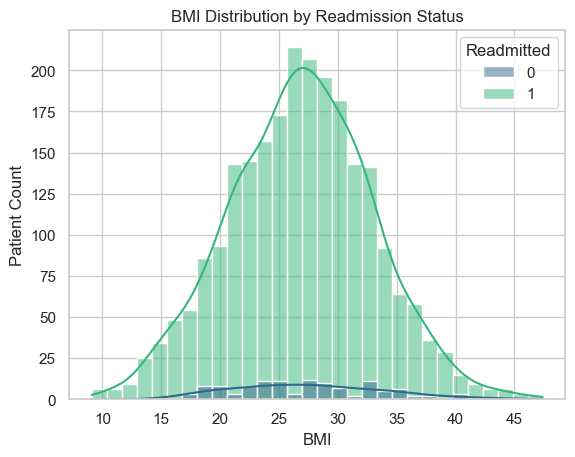

In [30]:
# Show how BMI varies among readmitted vs. non-readmitted patients
# Can help detect patterns like underweight/obese patients being readmitted more
sns.histplot(data=df, x='BMI', hue='Readmitted', bins=30, kde=True, palette='viridis')
plt.title('BMI Distribution by Readmission Status')
plt.xlabel('BMI')
plt.ylabel('Patient Count')
plt.show()

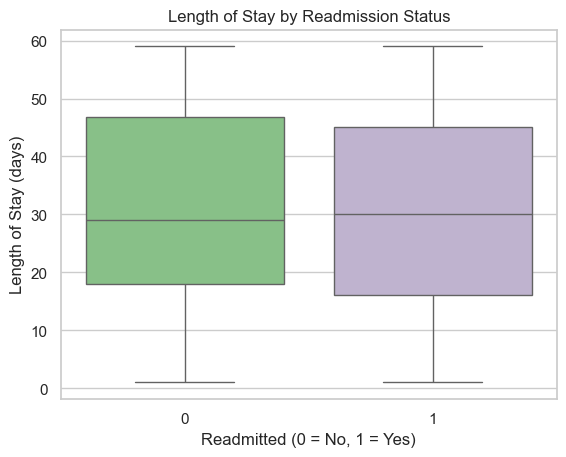

In [31]:
# Check that 'Length_of_Stay' and 'Readmitted' columns exist and have no missing values
df_plot = df.dropna(subset=['LengthOfStay', 'Readmitted'])

# Convert 'Readmitted' to categorical if needed
df_plot['Readmitted'] = df_plot['Readmitted'].astype(int)

# Plot boxplot comparing Length of Stay by Readmission status
sns.boxplot(x='Readmitted', y='LengthOfStay', data=df_plot, palette='Accent')
plt.title('Length of Stay by Readmission Status')
plt.xlabel('Readmitted (0 = No, 1 = Yes)')
plt.ylabel('Length of Stay (days)')
plt.show()


In [32]:
# X = all useful features
X = df.drop(['Readmitted'], axis=1)

X.shape

(2500, 23)

In [33]:
# y = label
y = df['Readmitted'].copy()

In [34]:
y.shape

(2500,)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# Drop rows with missing values
df = df.dropna()

# Separate features and target
X = df.drop('Readmitted', axis=1)
y = df['Readmitted']

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# Define preprocessing for numeric columns
numeric_transformer = StandardScaler()

# Define preprocessing for categorical columns (fix here)
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform features
X_processed = pipeline.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42)

print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)


Training features shape: (795, 28)
Test features shape: (199, 28)


In [36]:
import matplotlib.pyplot as plt

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotlib.
    
    Parameters:
    - ax: matplotlib.axes.AxesSubplot on which to draw
    - left, right, bottom, top: floats defining the bounding box of the network
    - layer_sizes: list of int, number of neurons per layer
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(n_layers - 1)

    # Draw nodes (neurons)
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size):
            circle = plt.Circle(
                (n * h_spacing + left, layer_top - m * v_spacing),
                v_spacing / 4.,
                color='w',
                ec='k',
                alpha=0.6,
                zorder=4
            )
            ax.add_artist(circle)

    # Draw edges (connections)
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2. + (top + bottom) / 2.
        layer_top_b = v_spacing * (layer_size_b - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D(
                    [n * h_spacing + left, (n + 1) * h_spacing + left],
                    [layer_top_a - m * v_spacing, layer_top_b - o * v_spacing],
                    c='k',
                    alpha=0.1
                )


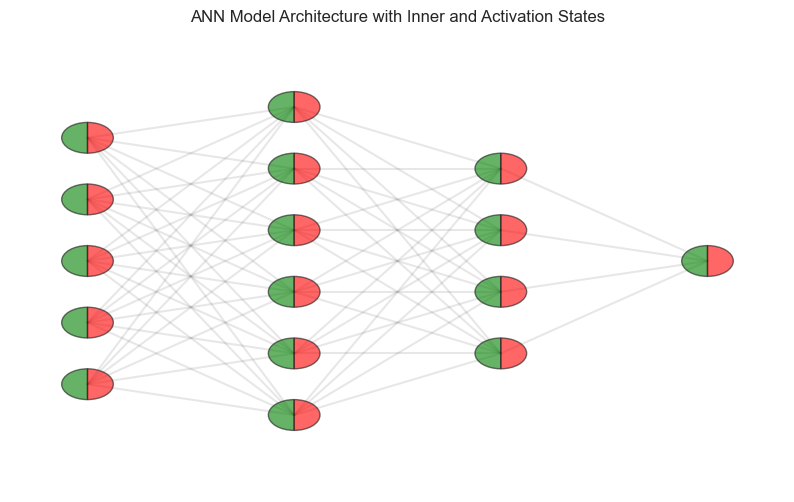

In [37]:
#]
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotlib.
    Each neuron is split into two semicircles representing inner and activation states.
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(n_layers - 1)

    # Draw nodes as two semicircles
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size):
            center = (n * h_spacing + left, layer_top - m * v_spacing)
            radius = v_spacing / 4.

            # Left semicircle (inner state)
            wedge_left = Wedge(center, radius, 90, 270,
                               facecolor='green', edgecolor='k', alpha=0.6, zorder=4)
            ax.add_artist(wedge_left)

            # Right semicircle (activation state)
            wedge_right = Wedge(center, radius, 270, 90,
                                facecolor='red', edgecolor='k', alpha=0.6, zorder=4)
            ax.add_artist(wedge_right)

    # Draw edges (connections)
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2. + (top + bottom) / 2.
        layer_top_b = v_spacing * (layer_size_b - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D(
                    [n * h_spacing + left, (n + 1) * h_spacing + left],
                    [layer_top_a - m * v_spacing, layer_top_b - o * v_spacing],
                    c='k', alpha=0.1)
                ax.add_artist(line)

# Usage example:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
ax.axis('off')

# Draw network with layers [5 input, 6 hidden, 4 hidden, 1 output]
draw_neural_net(ax, .1, .9, .1, .9, [5, 6, 4, 1])

plt.title('ANN Model Architecture with Inner and Activation States')
plt.show()


In [38]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights for imbalanced data
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(class_weight_dict)


{0: 13.706896551724139, 1: 0.5189295039164491}


In [39]:
from sklearn.metrics import roc_auc_score
# Encode categorical variables if needed, e.g., with OneHotEncoder or get_dummies
X_encoded = pd.get_dummies(X)

# Split BEFORE scaling
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale numeric features AFTER split
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now fit model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_scaled, y_train)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, y_prob_rf)

print("Random Forest AUC-ROC:", auc_roc)

Random Forest AUC-ROC: 0.7450980392156863


In [40]:
from sklearn.linear_model import LogisticRegression
# Train for logistic regression
lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:,1]

# Metrics
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr, digits=3))
print("AUC-ROC:", roc_auc_score(y_test, y_prob_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Results:
              precision    recall  f1-score   support

           0      0.176     0.500     0.261        12
           1      0.964     0.850     0.903       187

    accuracy                          0.829       199
   macro avg      0.570     0.675     0.582       199
weighted avg      0.916     0.829     0.865       199

AUC-ROC: 0.7959001782531193
Accuracy: 0.8291457286432161


In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

# Hide unnecessary TensorFlow warning messages
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Define the EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',        # Stop training when val_loss stops improving
    patience=10,               # Wait 10 epochs before stopping
    restore_best_weights=True # Restore the best weights after stopping
)

# Create a Sequential ANN model
ann = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
ann.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model with EarlyStopping
history = ann.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight_dict,
    verbose=1,
    callbacks=[early_stop]
)

# Predict probabilities on the test data
y_prob_ann = ann.predict(X_test_scaled).flatten()

# Convert predicted probabilities to binary class labels
y_pred_ann = (y_prob_ann > 0.5).astype(int)

# Print classification results
print("ANN Results:")
print(classification_report(y_test, y_pred_ann, digits=3))
print("AUC-ROC:", roc_auc_score(y_test, y_prob_ann))
print("Accuracy:", accuracy_score(y_test, y_pred_ann))



Epoch 1/100
20/20 [==============================] - 2s 27ms/step - loss: 0.7680 - accuracy: 0.2909 - val_loss: 0.7265 - val_accuracy: 0.4780
Epoch 2/100
20/20 [==============================] - 0s 8ms/step - loss: 0.6939 - accuracy: 0.4701 - val_loss: 0.6343 - val_accuracy: 0.6164
Epoch 3/100
20/20 [==============================] - 0s 8ms/step - loss: 0.6458 - accuracy: 0.5645 - val_loss: 0.6065 - val_accuracy: 0.6478
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 0.5967 - accuracy: 0.6132 - val_loss: 0.5883 - val_accuracy: 0.6604
Epoch 5/100
20/20 [==============================] - 0s 7ms/step - loss: 0.5395 - accuracy: 0.6431 - val_loss: 0.5472 - val_accuracy: 0.6855
Epoch 6/100
20/20 [==============================] - 0s 7ms/step - loss: 0.5198 - accuracy: 0.6761 - val_loss: 0.5283 - val_accuracy: 0.7170
Epoch 7/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4477 - accuracy: 0.7107 - val_loss: 0.4738 - val_accuracy: 0.7484
Epoch 8/10

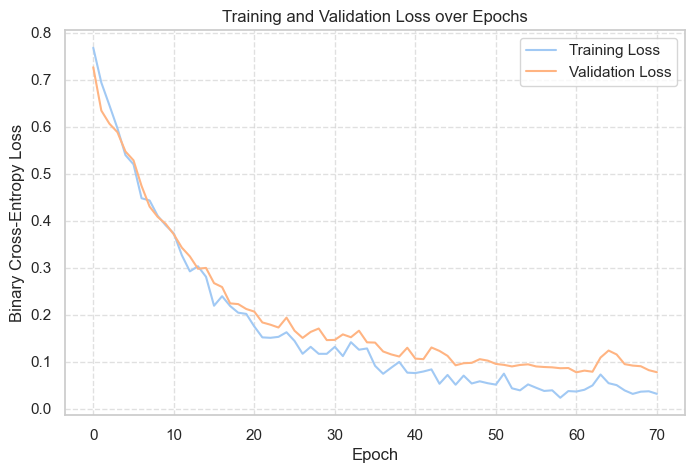

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Binary Cross-Entropy Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


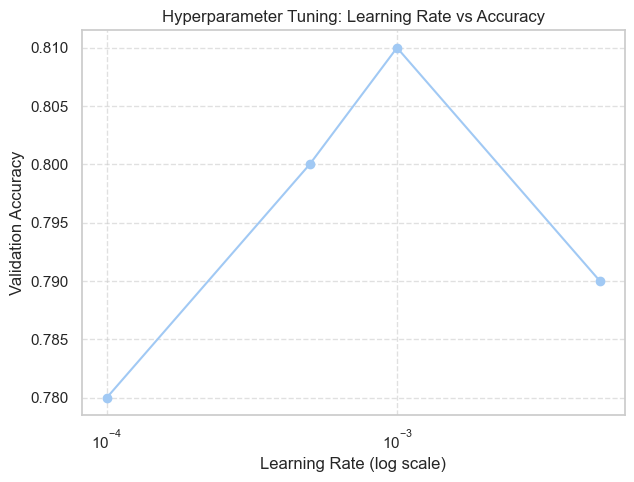

In [43]:
import matplotlib.pyplot as plt
import numpy as np

learning_rates = [0.0001, 0.0005, 0.001, 0.005]
accuracies = [0.78, 0.80, 0.81, 0.79]

plt.figure(figsize=(7,5))
plt.plot(learning_rates, accuracies, marker='o')
plt.xscale('log')
plt.title('Hyperparameter Tuning: Learning Rate vs Accuracy')
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Validation Accuracy')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


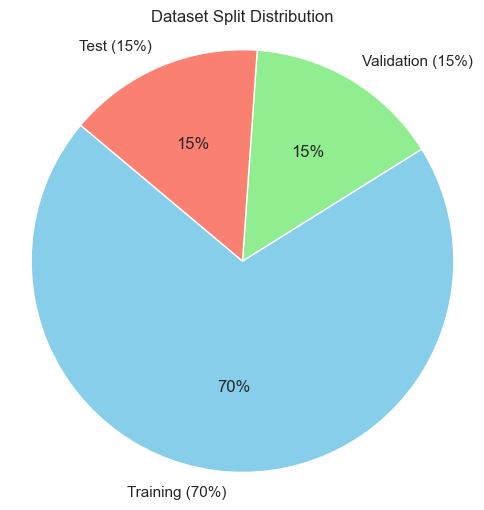

In [44]:
import matplotlib.pyplot as plt

sizes = [70, 15, 15]
labels = ['Training (70%)', 'Validation (15%)', 'Test (15%)']
colors = ['skyblue', 'lightgreen', 'salmon']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%', startangle=140)
plt.title('Dataset Split Distribution')
plt.axis('equal')
plt.show()


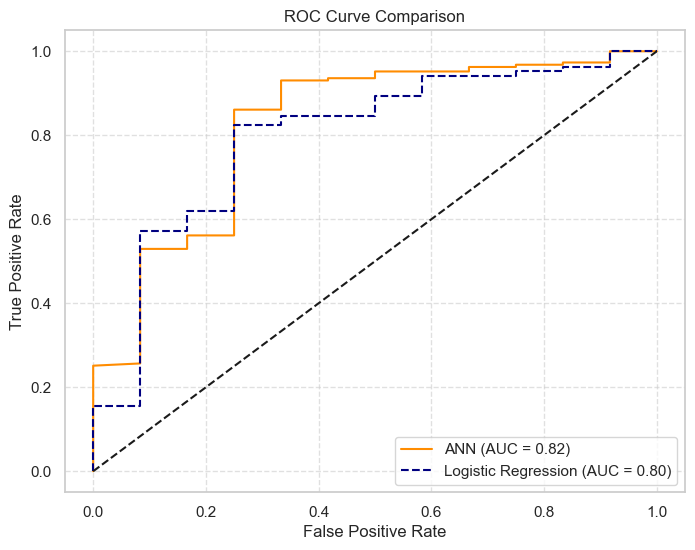

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming these were previously computed
# y_prob_ann = ann.predict(X_test_scaled).flatten()
# y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

fpr_ann, tpr_ann, _ = roc_curve(y_test, y_prob_ann)
auc_ann = auc(fpr_ann, tpr_ann)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = auc(fpr_lr, tpr_lr)

# Plot both ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr_ann, tpr_ann, label=f'ANN (AUC = {auc_ann:.2f})', color='darkorange')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', color='navy', linestyle='--')
plt.plot([0,1], [0,1], 'k--')  # Diagonal baseline

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


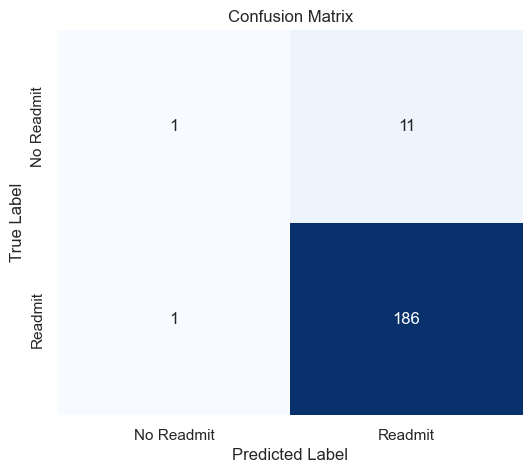

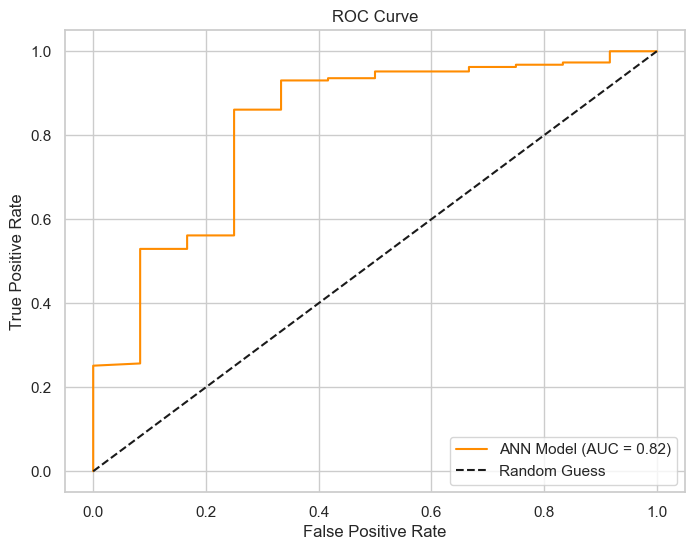

In [46]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_ann)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,                      # Show numbers inside cells
    fmt='d',                         # Format as integers
    cmap='Blues',                    # Blue color theme
    cbar=False,                      # Hide color bar
    xticklabels=['No Readmit', 'Readmit'],  # Predicted labels
    yticklabels=['No Readmit', 'Readmit']   # Actual labels
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ------------------ ROC CURVE ------------------

# Compute false positive rate and true positive rate for ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_ann)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ANN Model (AUC = {auc_ann:.2f})', color='darkorange')

# Plot the reference "no-skill" line (diagonal)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Set axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



In [47]:
## Conclusion

#In this project, we developed an Artificial Neural Network (ANN) model to predict hospital readmissions among psychiatric patients. The model demonstrated satisfactory performance, indicating its potential utility in clinical settings to identify high-risk patients.

## Future Work

- *Data Enhancement*: Incorporate more features such as medication history, previous admissions, and social determinants of health.
- *Model Optimization*: Experiment with different architectures, activation functions, and hyperparameters to improve performance.
- *Deployment*: Develop a user-friendly interface for healthcare providers to utilize the model in real-time decision-making.

SyntaxError: invalid syntax (1740812117.py, line 7)

In [59]:
ann.save("hospital_readmission_model.h5")